## HT8 - Proyecto 2. Entrega 6
### SVM
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import svm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [2]:
house_prices = svm.drop_many_nulls(house_prices)
house_prices = svm.trans_categorical(house_prices)

In [3]:
house_prices.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.049958,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,2.39589,1.396575,2.514384,2.842466,2.310274,2.815068,4.741781,1057.429452,1.036301,4.145205,0.934932,3.682877,1162.626712,1515.463699,0.425342,1.565068,0.382877,2.866438,2.511644,6.517808,5.749315,0.613014,2.485616,1978.506164,1.715753,1.767123,472.980137,3.927397,3.960959,1.856164,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,24.284752,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.57428,0.722394,0.784837,0.676527,1.165663,1.874410,0.946713,438.705324,0.295124,0.959501,0.246731,1.051834,386.587738,525.480383,0.518911,0.550916,0.502885,0.815778,0.663760,1.625393,0.979659,0.644666,1.933206,24.689725,0.892831,0.747315,213.804841,0.647822,0.566832,0.496592,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,59.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,1.000000,1.000000,8.000000,8.000000,2.00000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000,795.750000,1.000000,3.000000,1.000000,4.000000,882.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,2.000000,5.000000,6.000000,0.000000,1.000000,1961.000000,1.000000,1.000000,334.500000,4.000000,4.000000,2.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,5.000000,1973.000000,1994.000000,1.000000,1.000000,12.000000,13.000000,2.00000,1.000000,3.000000,3.000000,3.000000,2.000000,5.000000,991.500000,1.000000,5.000000,1.000000,4.000000,1087.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,2.000000,6.000000,6.000000,1.000000,1.000000,1980.000000,2.000000,2.00

c:\Users\diego\OneDrive\Escritorio\2025\Semestre VII\Mineria\SVM\svm.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


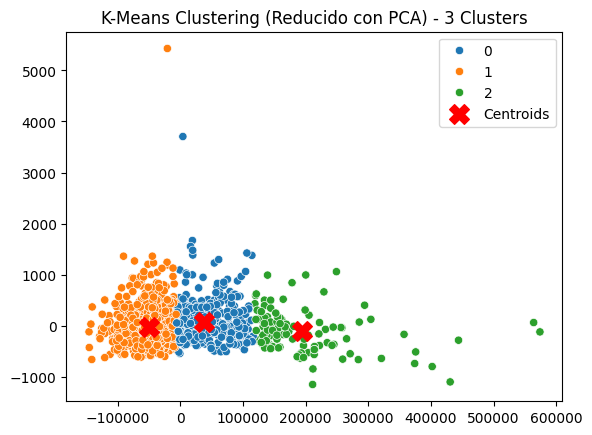

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict


cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = svm.breif_clustering(cluster_set, 3)

In [5]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses = scaler.fit_transform(house_prices)

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Reemplazar los valores numéricos por etiquetas de texto
label_map = {
    0: 'medio',
    1: 'barato',
    2: 'caro'
}
house_prices['price_group'] = house_prices['price_group'].map(label_map)


In [7]:
house_prices.groupby('price_group').size()

price_group
barato    826
caro      116
medio     518
dtype: int64

### MODELO 1

In [8]:
target = house_prices.pop('price_group')
data = house_prices

In [9]:
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split

random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [10]:
numeric_columns = house_prices.select_dtypes(include=['float64', 'int64']).columns.drop('price_group', errors='ignore')
categoric_columns = house_prices.select_dtypes(include=['object']).columns.drop('price_group', errors='ignore')

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,categoric_columns),
    ('numerico', numeric_preprocessor,numeric_columns)
],remainder="passthrough")

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

modelo = make_pipeline(preprocesador, SVC(kernel="linear"))


In [13]:
modelo.fit(data_train,target_train)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object'))])),
                ('svc', SVC(kernel='linear'))])

In [14]:
modelo.score(data_test,target_test)

0.9360730593607306

Precisión del modelo: 0.95
              precision    recall  f1-score   support

      barato       0.97      0.97      0.97       825
        caro       0.87      0.89      0.88       113
       medio       0.94      0.93      0.93       522

    accuracy                           0.95      1460
   macro avg       0.93      0.93      0.93      1460
weighted avg       0.95      0.95      0.95      1460



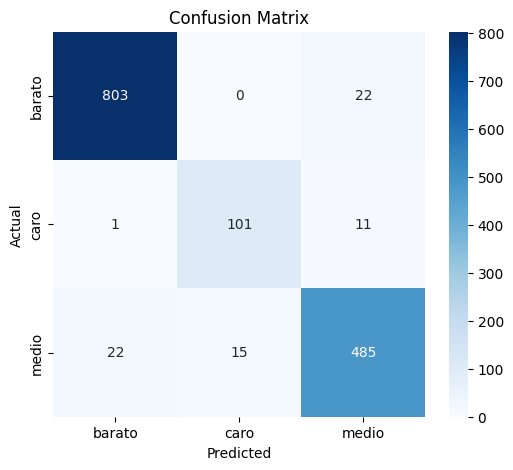

In [15]:
target_pred = cross_val_predict(modelo, data, target, cv = 10)

svm.metrics_and_cm(target, target_pred)

### MODELO 2

In [16]:
from sklearn.model_selection import GridSearchCV

modelo2 = make_pipeline(preprocesador, SVC(kernel="poly"))
_=modelo2.fit(data_train,target_train)
param_grid = {
    'svc__C': (0.01, 0.1, 1, 5,16,32),
    'svc__degree':(2,3,5,7)
    }
model_grid_search = GridSearchCV(modelo2, param_grid=param_grid,
                                 n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
print("Accuracy: ",accuracy)
model_grid_search.best_params_

Accuracy:  0.9155251141552512


{'svc__C': 16, 'svc__degree': 3}

Precisión del modelo: 0.90
              precision    recall  f1-score   support

      barato       0.95      0.93      0.94       844
        caro       0.72      0.90      0.80        93
       medio       0.87      0.86      0.86       523

    accuracy                           0.90      1460
   macro avg       0.85      0.90      0.87      1460
weighted avg       0.90      0.90      0.90      1460



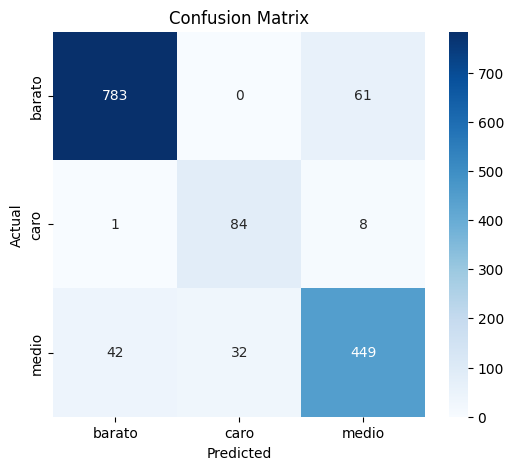

In [17]:
target_pred2 = cross_val_predict(modelo2, data, target, cv = 10)

svm.metrics_and_cm(target, target_pred2)

### Modelo 3

In [18]:
modelo3 = make_pipeline(preprocesador, SVC(kernel="rbf"))
_=modelo3.fit(data_train,target_train)
param_grid = {
    'svc__C': (0.01, 0.1, 1, 5,16,32),
    'svc__gamma':(0.0000000002,0.00002,0.01,0.1,20,200 )
    }
model_grid_search = GridSearchCV(modelo3, param_grid=param_grid,
                                 n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
print("Accuracy: ",accuracy)
model_grid_search.best_params_

Accuracy:  0.8835616438356164


{'svc__C': 5, 'svc__gamma': 0.01}

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.95      0.92      0.94       851
        caro       0.56      0.92      0.70        71
       medio       0.86      0.83      0.85       538

    accuracy                           0.89      1460
   macro avg       0.79      0.89      0.83      1460
weighted avg       0.90      0.89      0.89      1460



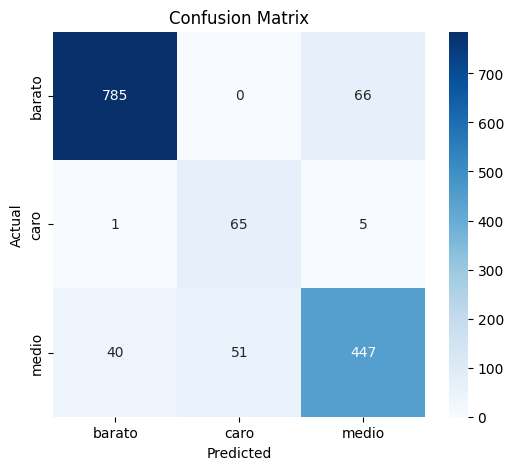

In [20]:
target_pred3 = cross_val_predict(modelo3, data, target, cv = 10)

svm.metrics_and_cm(target, target_pred3)